# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Anakta Raffaell Tambunan]
- **Email:** [anakta123456789@gmail.com]
- **ID Dicoding:** [Anakta Raffaell Tambunan]

## Menentukan Pertanyaan Bisnis

- pada keempat musim, musim apa yang memiliki jumlah sewa paling tinggi
- bagaimana hubungan antara temperatur dan juga jumlah penyewa

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Memanggil semua library yang digunakan

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/R4ffaell/Bike-Sharing-Dataset/main/day.csv")
day_df.head()

In [ ]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/R4ffaell/Bike-Sharing-Dataset/main/hour.csv")
hours_df.head()

Digunakan agar dapat membaca 5 data top yang sudah di upload dari github

### Assessing Data

Melakukan pengecekan pada data yang tersedia, apakah terdapat duplikat, null, dan sebagainya

In [ ]:
day_df.info()

In [ ]:
hours_df.info()

In [ ]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

In [ ]:
day_df.describe()

In [ ]:
day_df.info()

In [ ]:
hours_df.info()

In [ ]:
hours_df.isna().sum()

In [ ]:
day_df.isnull().sum()

### Cleaning Data

In [ ]:
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(hours_df[column])
  hours_df[column] = pd.to_datetime(hours_df[column])

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
Q1 = (day_df['registered']).quantile(0.25)
Q3 = (day_df['registered']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['registered'] < minimum
kondisi_more_than = day_df['registered'] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melakukan pembersihan pada data, jika terdapat duplikasi data, terdapat file yang tidak ada isinya, dan mendrop column yang tidak digunakan

## Exploratory Data Analysis (EDA)


In [ ]:
day_df.describe(include="all")

<ipython-input-18-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2011-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [ ]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "holiday": ["max", "min", "mean", "std"],
    "weekday": ["max", "min", "mean", "std"]
})

instant holiday                         weekday                        
       nunique     max min      mean       std     max min      mean       std
season                                                                        
1          181       1   0  0.038674  0.193352       6   0  3.000000  2.033060
2          184       1   0  0.021739  0.146228       6   0  2.989130  1.999970
3          188       1   0  0.021277  0.144690       6   0  3.031915  1.994389
4          178       1   0  0.033708  0.180985       6   0  2.966292  2.008172

### Explore ...

menarik data yang ingin digunakan

## Visualization & Explanatory Analysis

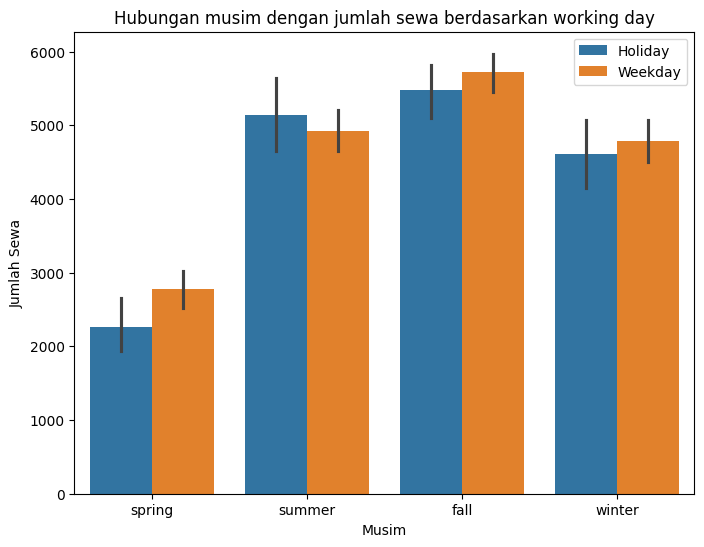

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

plt.figure(figsize=(8, 6))

colors = ["#1f77b4", "#ff7f0e"]  # Blue for Holiday, Orange for Working Day

ax = sns.barplot(x='season', y='cnt', data=day_df, hue='workingday', palette=colors)

plt.xticks(ticks=range(4), labels=[season_mapping[i] for i in range(1, 5)])

plt.title('Hubungan musim dengan jumlah sewa berdasarkan working day')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')

legend_labels = ['Holiday', 'Weekday']
plt.legend(title='Working Day', labels=legend_labels, loc='upper right')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='upper right')

plt.show()

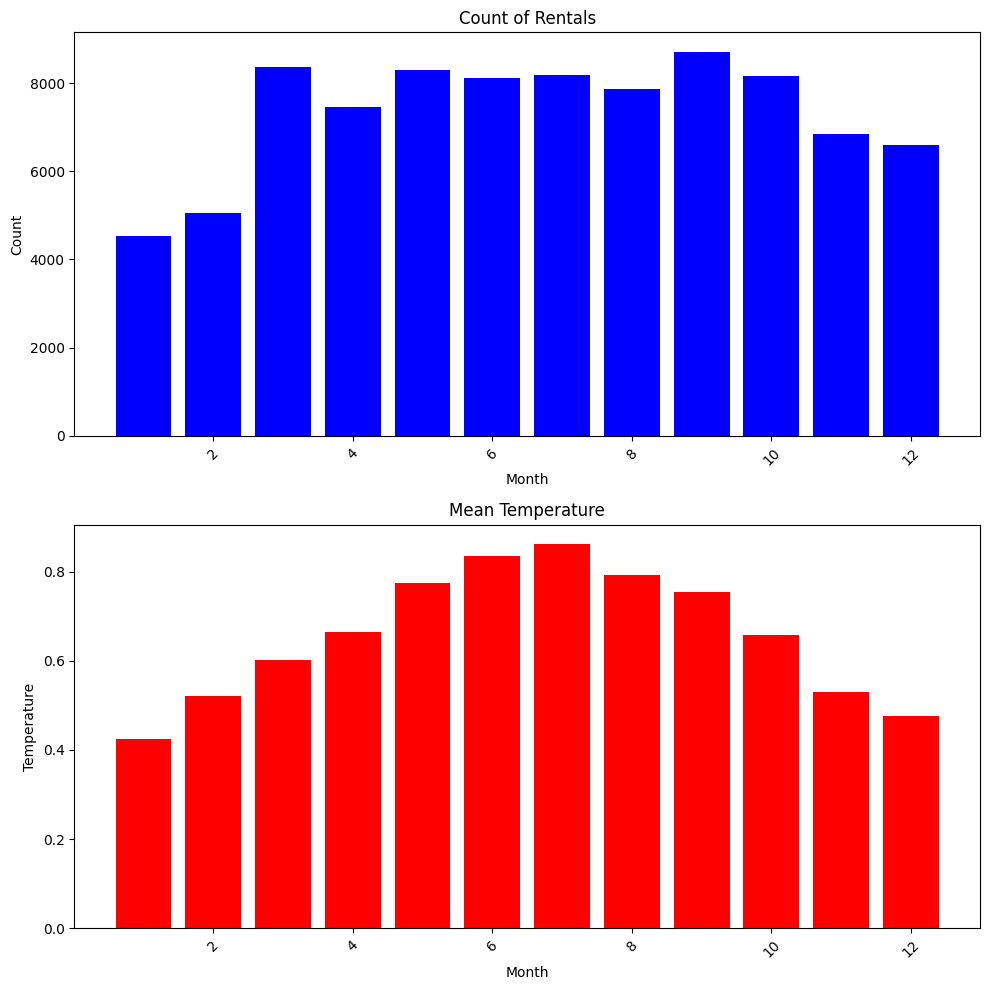

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'day_df' contains the original DataFrame with relevant data
# Assuming 'mnth.name' is the column containing month names

# Sort day_df by 'mnth.name'
day_df_sorted = day_df.sort_values(by='mnth')

# Plotting cnt and temp as separate plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot count of rentals (cnt)
axes[0].bar(day_df_sorted['mnth'], day_df_sorted['cnt'], color='blue')
axes[0].set_title('Count of Rentals')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot mean temperature (temp) with bars
axes[1].bar(day_df_sorted['mnth'], day_df_sorted['temp'], color='red')
axes[1].set_title('Mean Temperature')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Visualisasi dari data yang sudah disimpulkan

### Pertanyaan 1:

pada keempat musim, musim apa yang memiliki jumlah sewa paling tinggi?

JAWAB :Berdasarkan data di gambar, dapat ditarik kesimpulan bahwa musim dengan jumlah sewa paling tinggi adalah musim gugur, baik dari hari holiday maupun weekday.

### Pertanyaan 2:

bagaimana hubungan antara temperatur dan juga jumlah penyewa?

JAWAB : Berdasarkan gambar diatas, dapat dilihat bahwa jumlah temperatur dan juga jumlah penyewa adalah sebanding, yang artinya semakin temperatur naik maka jumlah penyewa juga meningkat, tetapi ini tidak terjadi 100% yang dimana terdapat bulan yang dimana temperatur meningkat tapi jumlah penyewa tidak meningkat.

In [ ]:
day_df.to_csv("all_data.csv", index=False)